In [1]:
import pandas as pd
from pathlib import Path
import glob, os
import os.path

# https://github.com/pemagrg1/text-classification

In [2]:
df = pd.read_pickle("./compilation_clean.pkl")
print(len(df)," elements")

30819  elements


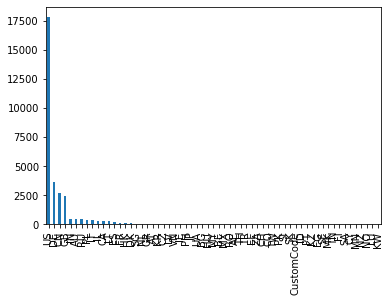

In [3]:
df.Country.value_counts().plot(kind='bar')

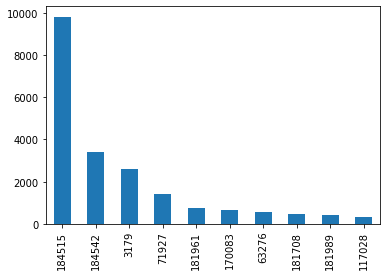

In [4]:
df.PrimaryCategoryID.value_counts()[:10].plot(kind='bar')

In [5]:
df.keys()

Index(['Description', 'EndTime', 'ViewItemURLForNaturalSearch', 'ListingType',
       'Location', 'GalleryURL', 'PictureURL', 'PrimaryCategoryID',
       'PrimaryCategoryName', 'BidCount', 'ListingStatus', 'TimeLeft', 'Title',
       'Country', 'AutoPay', 'ConditionID', 'ConditionDisplayName',
       'GlobalShipping', 'BuyItNowAvailable', 'ConvertedBuyItNowPrice',
       'ConditionDescription', 'QuantityAvailableHint', 'QuantityThreshold',
       '_currencyID', 'value', 'DiscountPriceInfo', 'Quantity'],
      dtype='object')

In [6]:
DFxl = df[["value","_currencyID","ViewItemURLForNaturalSearch","Title","PrimaryCategoryID","Country","Description"]].reset_index()
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk("/home/kelu/ultrasound/ebaystrove/images/") for f in filenames if os.path.splitext(f)[1] == '.jpg']
imagesID = [x.split(".")[-2].split("/")[-1] for x in images]
LIMIT = len('/home/kelu/ultrasound/ebaystrove/images/233384138652.jpg')
L = len("/home/kelu/ultrasound/ebaystrove/images/")
DFxl["group"] = "None"
for k in images:
    if len(k) > (LIMIT + 1):
        ID = k.split("/")[-1].split(".")[-2]
        DFxl["group"].loc[DFxl.ItemID == ID] = k.split("/")[-2]
dfAll = DFxl.copy()
DFxlNone = DFxl[(DFxl.group == "None")].reset_index().drop(['index'], axis=1)
DFxl = DFxl[~(DFxl.group == "None")].reset_index().drop(['index'], axis=1)

In [7]:
print(len(DFxl))
DFxl.head()

27140


,ItemID,value,_currencyID,ViewItemURLForNaturalSearch,Title,PrimaryCategoryID,Country,Description,group
0,184308556274,104.24,USD,https://www.ebay.com/itm/Aloka-Ultraschall-Kop...,"Aloka Ultraschall Kopf 7,5 Mhz",71927,DE,Artikel im guten optischen Zustand Auf Grun...,Array
1,124203515364,700.0,USD,https://www.ebay.com/itm/Philips-L12-5-Linear-...,Philips L12-5 Linear Array Ultrasound Probe,184515,US,Philips L12-5 Linear Array Ultrasound Probe. C...,Array
2,293595162471,2100.0,USD,https://www.ebay.com/itm/Esaote-PA230E-Ultraso...,Esaote PA230E Ultrasound Transducer New Compat...,184515,RU,This is a Premium compatible / generic probe f...,Array
3,133422944246,299.0,USD,https://www.ebay.com/itm/EDAN-DUS-3-ULTRASOUND...,EDAN DUS 3 ULTRASOUND with C361-1 transducer,100005,US,Used unit with probe.INFO REGARDING PURCHASING...,Array
4,224025745227,100.0,USD,https://www.ebay.com/itm/PHILIPS-15-6L-COMPACT...,PHILIPS 15-6L COMPACT LINEAR ARRAY ULTRASOUND ...,184515,US,PHILIPS 15-6L COMPACT LINEAR ARRAY ULTRASOUND ...,Array


In [8]:
import pickle 
with open('Pickles/DFNONE.pickle', 'wb') as output:
    pickle.dump(DFxlNone, output)

In [9]:
DFxlNone

,ItemID,value,_currencyID,ViewItemURLForNaturalSearch,Title,PrimaryCategoryID,Country,Description,group
0,293595138284,1020.0,USD,https://www.ebay.com/itm/Edan-L741-Ultrasound-...,Edan L741 Ultrasound Transducer New Compatible,184515,RU,This is a Premium compatible / generic probe f...,None
1,293595156659,1860.0,USD,https://www.ebay.com/itm/Esaote-LA522E-Ultraso...,Esaote LA522E Ultrasound Transducer New Compat...,184515,RU,This is a Premium compatible / generic probe f...,None
2,293595191213,1860.0,USD,https://www.ebay.com/itm/Ge-3C-RS-Ultrasound-T...,Ge 3C-RS Ultrasound Transducer New Compatible,184515,RU,This is a Premium compatible / generic probe f...,None
3,293595143491,1020.0,USD,https://www.ebay.com/itm/Edan-E611-1-Ultrasoun...,Edan E611-1 Ultrasound Transducer New Compatible,184515,RU,This is a Premium compatible / generic probe f...,None
4,293595166924,960.0,USD,https://www.ebay.com/itm/Fukuda-FUT-CS602-5AJ-...,Fukuda FUT-CS602-5AJ Ultrasound Transducer New...,184515,RU,This is a Premium compatible / generic probe f...,None
...,...,...,...,...,...,...,...,...,...
3674,293502381198,8.04,USD,https://www.ebay.com/itm/2pcs-TMP8085AP-2-UPC-...,[2pcs] TMP8085AP-2 UPC 8-Bit 3MHz NMOS DIP40 T...,159680,PL,.belka_amber {background: #006699;filter: prog...,None
3675,333568410927,41.7,USD,https://www.ebay.com/itm/Pregnant-Ultrasonic-F...,Pregnant Ultrasonic Fetal Doppler 2.5MHz Probe...,117028,US,\t\t\tDescription \...,None
3676,202865770570,5.29,USD,https://www.ebay.com/itm/1SS315-Toshiba-Schott...,"1SS315 - Toshiba Schotty Barriera Diodo - 5V,3...",11704,GB,"1SS315 (TPH3, F) - Diodo barriera Toshiba Scho...",None
3677,274375932779,30.31,USD,https://www.ebay.com/itm/6g9q9e882ca-luftventi...,6g9q9e882ca luftventil ford galaxy (ca1) ghia ...,33548,ES,"Desguaces Motocoche - Ebay @charset ""utf-8...",None


# Saving actual, stored data

In [10]:
DFxl.to_excel("learning.xlsx", sheet_name='learning') 


In [11]:
dfAll.to_excel("dfAll.xlsx", sheet_name='dfAll') 